# Lab 7 - Dynamic Programming - Power Plant

Information on group members:

1) 156071, Martyna Stasiak <br>
2) 156062, Maria Musiał

In [22]:
%matplotlib inline

from sympy.interactive import printing
printing.init_printing(use_latex=True)

import matplotlib.pyplot as plt
import sympy as sym
from sympy import *
import numpy as np
from sympy import Max, Min

This exercise is inspired by Ex. 2 in the Exercises.pdf file. You have to set operating levels for a power plant for consecutive two-months in a way that minimizes the operating costs (using dynamic programming). Before going to the exercise, it is recommended to get acquainted with a Python library for symbolic calculations - SymPy, which can be particularly helpful for solving this task. 

# Mini tutorial on SymPy

SymPy is a library for performing symbolic calculations instead of numerical. It allows defining symbols, functions, expressions, equations and performing various operations on them. The examples of such operations that can help solve this exercise are given below. Note that due to lines: <br><br>
from sympy.interactive import printing <br>
printing.init_printing(use_latex=True)  <br><br>
located in the first cell of this notebook, the symbols can be printed using latex, improving hence readability

<b> Defining symbols: </b>

In [2]:
z1, z2 = symbols("z1 z2")
# or z = symbols("z1 z2")

<b> Printing a symbol using Latex: </b>

In [3]:
z1

<b> Defining an expression: </b>

In [4]:
2*z1 + (10-z2)**2

<b>Expanding the expression:</b>

In [5]:
expand(2*z1 + (10-z2)**2)

<b> Simplifying the expression:</b>

In [6]:
e = simplify(expand(2*z1 + (10-z2)**2 - (5+z1)**2))
e

<b> Substituting a variable with a value in the expression:</b>

In [7]:
e = 2*z1 + (10-z1)**2
v = e.evalf(subs={z1: 10})
print(v)

20.0000000000000


<b> Substituting a variable with another variable or value:</b>

In [8]:
e = 2*z1 + (10-z2)**2
e.subs(z2, z1)

<b> Finding a (partial) derivative: </b>

In [9]:
e = 2*z1 + (10-z2)**2
d = diff(e, z2)
d

<b> Solving an equation: </b>

In [10]:
e = 2*z1 + (10-z2)**2
d = diff(e, z2)
v = solve(Eq(d, 0), z2)
print(v)

[10]


# Exercise

Below given is the data. In contrast to the exercise shown in the Exercise.pdf file, note that all pairs of all 12 months are considered stages in this notebook. 

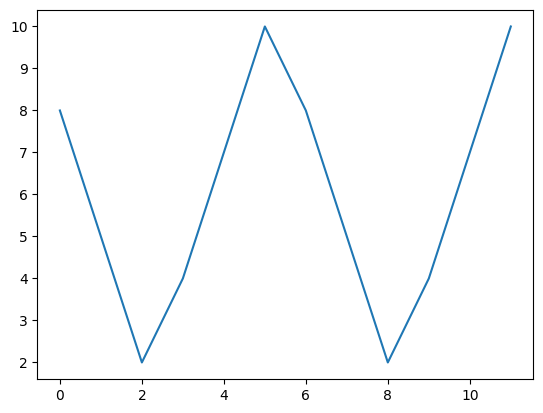

[[8, 10], [5, 10], [2, 10], [4, 10], [7, 10], [10, 10]]
[8, 5, 2, 4, 7, 10, 8, 5, 2, 4, 7, 10]


In [11]:
months = ["Jan-Feb", "Mar-Apr", "May-Jun", "Jul-Aug", "Sep-Oct", "Nov-Dec"]

### min requested operating level (1-10) + allowable bounds 
request = [8,5,2,4,7,10]
bounds = [[request[i], 10] for i in range(6)]

plt.plot([i for i in range(12)], request + request, label='linear')
plt.show()
print(bounds)
print(request + request)

<b> Cost: </b> Working above the required level - cost in a generic form:

In [12]:
xi, ri, mi1 = symbols("x_i r_i m_{i1}") 
cost_above = mi1*(xi-ri)
cost_above #mi1 = multiplicator, #xi = operating level #ri = requirement (lower bound)

You can do c = cost_above.copy() and then c.subs, replacing variables with values (m, p, r) or other variables (r): 

In [13]:
# x1 = symbols("x1") 
# c = cost_above.copy()
# c = c.subs(xi, x1)
# c = c.subs(mi1, 1)
# c = c.subs(ri, 100)
# c

Below are provided m parameter values for each month:

In [14]:
mv1 = [2, 8, 10, 12, 10, 6 ]

<b> Cost: </b> Chaging the operating level - cost in a generic form:

In [15]:
si, mi2, pi = symbols("s_{i} m_{i2} p_i") 
cost_change = mi2*(xi-si)**pi
cost_change #mi2 = multiplicator, #pi = exponent #xi = operating level (i-th month) #s_{i} = state: operating level ((i-1)-th month)
cost_change

Below are provided m and p parameter values for each month:

In [16]:
mv2 = [6, 4, 1, 1, 3, 5]
pv = [2, 2, 2, 2, 2, 2]

# Solution:

Apart from finding optimal operating levels for each month, plot these values along with the lower bounds for each month in order to show how they change in time.<br><br>Hints:<br>
- the optimal cost = 135.42<br>
- there is no situation when the minima for first derivatives are outside allowable bounds (but test it anyway)<br><br>

After obtaining and plotting the solution, check what would happen is you change the mv1[2] parameter to 5. 

In [17]:
def PowerPlant(bounds, cost_above, mv1, cost_change, mv2, pv):
    all_x, all_s, all_c_above, all_c_change = [], [], [], []
    x_for_stages = [symbols(f's{i}') for i in range(1, len(bounds) + 2)]
    x_for_stages[0] = 10 
    print("Initial symbolic states for stages:", x_for_stages)
    

    
    
    for stage in range(len(bounds), 0, -1): #we approach this starting with the last stage
        
        #adding a new stage to the list of all stages to check if we are going throug every one of them 
        x = symbols("x"+str(stage))
        s = symbols(f"s{stage}")
        all_s.append(s)
        all_x.append(x)
        
        #changing the cost of going above the requirement of the current stage
        #cost_above = mi1*(xi-ri)
        c_above = cost_above.copy()
        c_above = c_above.subs(xi, x)
        c_above = c_above.subs(mi1, mv1[stage-1])
        c_above = c_above.subs(ri, bounds[stage-1][0])
        all_c_above.append(c_above)
        
        #changing the cost of changing the stage for the current stage
        #cost_change = mi2*(xi-si)**pi
        c_change = cost_change.copy()
        c_change = c_change.subs(xi, x)
        c_change = c_change.subs(mi2, mv2[stage-1])
        c_change = c_change.subs(si, x_for_stages[stage-1])
        c_change = c_change.subs(pi, pv[stage-1])
        all_c_change.append(c_change)
        
        print(f"Stage {stage}:")
        print(f"  Cost Above: {c_above}")
        print(f"  Cost Change: {c_change}")

        
        print('\n')

            
            
        

        
        
        
        
        
    return x_for_stages[:len(bounds)]
        

In [25]:
from sympy import symbols, diff, solve, Eq, Integer

def PowerPlant(bounds, cost_above, mv1, cost_change, mv2, pv):
    all_x, all_s, all_c_above, all_c_change = [], [], [], []
    x_for_stages = [symbols(f's{i}') for i in range(1, len(bounds) + 2)]
    x_for_stages[0] = 10  # Initial operating level
    print("Initial symbolic states for stages:", x_for_stages)

    # Storage for results
    optimal_x = []  # To store optimal values for each stage
    fi_prev_opt = Integer(0)  # Initialize as a symbolic zero
    fi_list = []  # To store the optimal costs for each stage

    for stage in range(len(bounds), 0, -1):  # Start from the last stage and go backward
        x = symbols(f"x{stage}")
        s = symbols(f"s{stage}")
        all_s.append(s)
        all_x.append(x)

        # Adjust cost_above for the current stage
        c_above = cost_above.copy()
        c_above = c_above.subs(xi, x)
        c_above = c_above.subs(mi1, mv1[stage - 1])
        c_above = c_above.subs(ri, bounds[stage - 1][0])
        all_c_above.append(c_above)

        # Adjust cost_change for the current stage
        c_change = cost_change.copy()
        c_change = c_change.subs(xi, x)
        c_change = c_change.subs(mi2, mv2[stage - 1])
        c_change = c_change.subs(si, x_for_stages[stage - 1])
        c_change = c_change.subs(pi, pv[stage - 1])
        all_c_change.append(c_change)

        # Total cost for the current stage
        total_cost = c_above + c_change + fi_prev_opt.subs(x_for_stages[stage], x)

        # Compute first derivative and find its minimum
        total_cost_derivative = diff(total_cost, x)
        xi_opt = solve(Eq(total_cost_derivative, 0), x)

        # If solve fails to find a numerical solution, fall back to the midpoint of bounds
        if not xi_opt:
            xi_opt = (bounds[stage - 1][0] + bounds[stage - 1][1]) / 2
        else:
            xi_opt = xi_opt[0]  # Use the first solution

        # Ensure xi_opt is within bounds
        xi_opt = max(bounds[stage - 1][0], min(bounds[stage - 1][1], xi_opt))

        # Update fi_prev_opt for the next iteration
        fi_prev_opt = total_cost.subs(x, xi_opt)
        fi_list.append(fi_prev_opt)

        # Store the optimal xi
        optimal_x.append(xi_opt)

        print(f"Stage {stage}:")
        print(f"  Optimal xi: {xi_opt}")
        print(f"  Total Cost: {fi_prev_opt}")

    # Reverse the order of results to match the forward stages
    optimal_x.reverse()
    return optimal_x, fi_list[-1]


In [26]:
PowerPlant(bounds, cost_above, mv1, cost_change, mv2, pv)

Initial symbolic states for stages: [10, s2, s3, s4, s5, s6, s7]


NotImplementedError: multiple generators [x6, (-s6 + x6)**p_i]
No algorithms are implemented to solve equation 5*p_i*(-s6 + x6)**p_i/(-s6 + x6) + 6

In [27]:
PowerPlant(bounds, cost_above, mv1, cost_change, mv2, pv)

Initial symbolic states for stages: [10, s2, s3, s4, s5, s6, s7]
Stage 6:
  Derivative: -10*s6 + 10*x6 + 6
  Critical Points: [s6 - 3/5]
  Valid Points: []
  Candidates: [10, 10]
  Evaluated Costs: {10: 500.0*(1 - 0.1*s6)**2}
  Optimal x[6]: 10
--------------------------------------------------


TypeError: cannot determine truth value of Relational